# Project: co2 emissions by vehicles
<font color='blue'> <font size='4'>**Business Objective:**</font>

The fundamental goal here is to model the CO2 emissions as a function of several car engine features.

<font color='blue'> <font size='4'>**Data Set Details:** </font>

The file contains the data for this example. Here the number of variables (columns) is 12, and the number of instances (rows) is 

7385. In that way, this problem has the 12 following variables:

**make** - car brand under study.

**model** - the specific model of the car.

**vehicle_class** - car body type of the car.

**engine_size** - size of the car engine, in Liters.

**cylinders** - number of cylinders.

**transmission** - "A" for`Automatic', "AM" for ``Automated manual', "AS" for 'Automatic with select shift', "AV" for 'Continuously 

variable', "M" for 'Manual'.

**fuel_type** - "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'.

**fuel_consumption_city** - City fuel consumption ratings, in liters per 100 kilometers.

**fuel_consumption_hwy** - Highway fuel consumption ratings, in liters per 100 kilometers.

**fuel_consumption_comb(l/100km)** - the combined fuel consumption rating (55% city, 45% highway), in L/100 km.

**fuel_consumption_comb(mpg)** - the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg).

**co2_emissions** - the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer.

**Acceptance Criterion:** Need to deploy the end results using Flask /Streamlit etc




 <font color='green'> <font size='5'>**Importing some required libraries** </font>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<font color='green'> <font size='5'>**Importing the dataset** </font>

In [2]:
df=pd.read_csv('co2_emissions.csv')
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


<font color='green'> <font size='5'>**EDA (Exploratory data analysis)** </font>

In [3]:
#checking the shape of the dataset
df.shape

(7385, 12)

In [4]:
#checking any null values is there in dataset
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [5]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [6]:
#checking the descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [7]:
# checking any duplicated values is there in the data set
df.duplicated().any()

True

In [8]:
df[df.duplicated()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [9]:
# we got duplicated values
# lets drop them
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().any()

False

In [11]:
# again i'm checking descriptive statistics after removing the duplicated values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,6273.0,3.163000,1.365294,0.9,2.0,3.0,3.7,8.4
cylinders,6273.0,5.620596,1.846424,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,6273.0,12.615591,3.550572,4.2,10.1,12.1,14.7,30.6
fuel_consumption_hwy,6273.0,9.073426,2.277893,4.0,7.5,8.7,10.3,20.6
fuel_consumption_comb(l/100km),6273.0,11.022111,2.945028,4.1,8.9,10.6,12.7,26.1
fuel_consumption_comb(mpg),6273.0,27.395026,7.225472,11.0,22.0,27.0,32.0,69.0
co2_emissions,6273.0,251.247250,59.235396,96.0,208.0,246.0,289.0,522.0


In [12]:
#columns names are too long because of that we have to short them
df.rename(columns={'fuel_consumption_city':'fuel_con_city','fuel_consumption_hwy':'fuel_con_hwy', 
                   'fuel_consumption_comb(l/100km)':'fl_con_comb(l/100km)',
                   'fuel_consumption_comb(mpg)':'fl_con_comb(mpg)'},inplace=True)

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_con_city,fuel_con_hwy,fl_con_comb(l/100km),fl_con_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


  <font color='green'> <font size='5'>**Visualization** </font> 

In [15]:
numerical_features=[features for features in df.columns if df[features].dtypes !='O']
numerical_features

['engine_size',
 'cylinders',
 'fuel_con_city',
 'fuel_con_hwy',
 'fl_con_comb(l/100km)',
 'fl_con_comb(mpg)',
 'co2_emissions']

In [16]:
categorical_features=[features for features in df.columns if df[features].dtypes =='O']
categorical_features

['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

engine_size


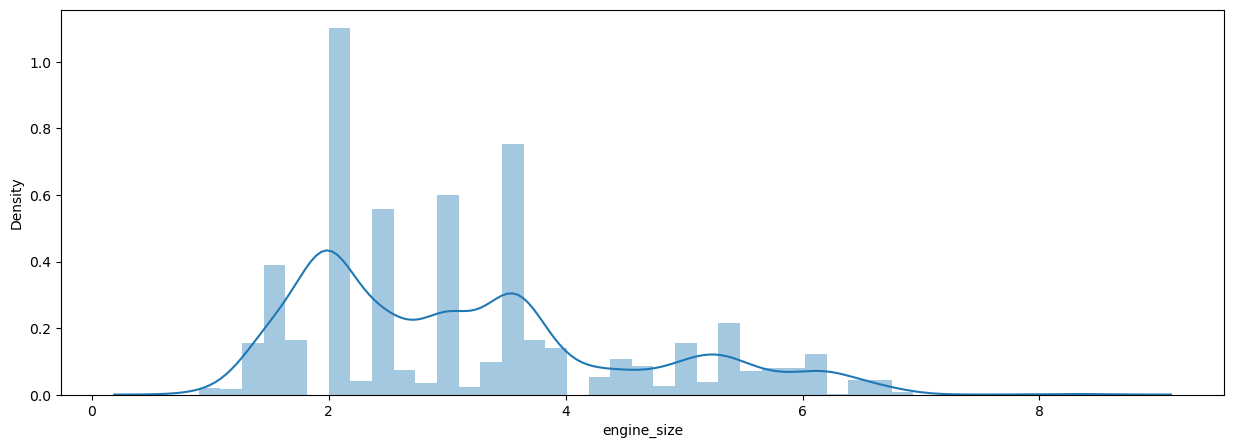

cylinders


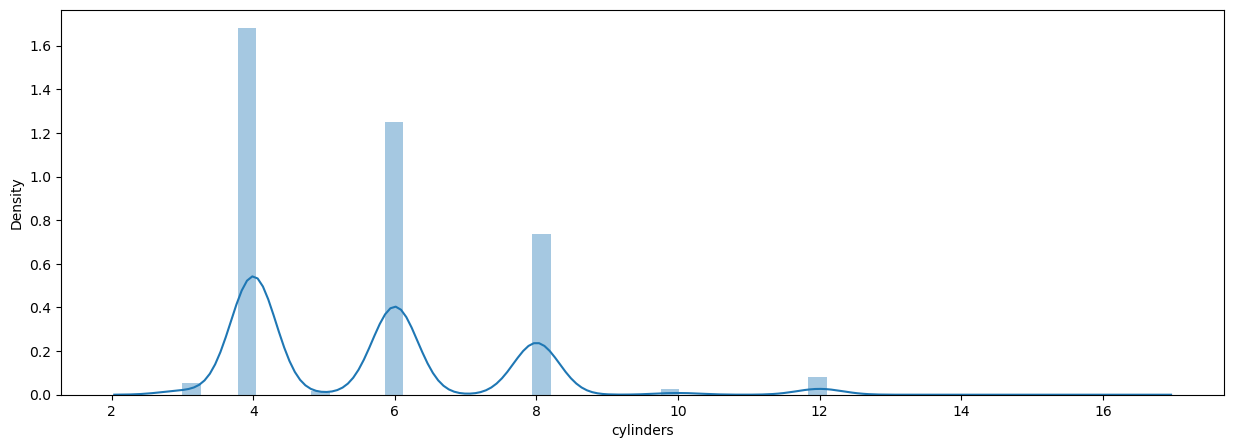

fuel_con_city


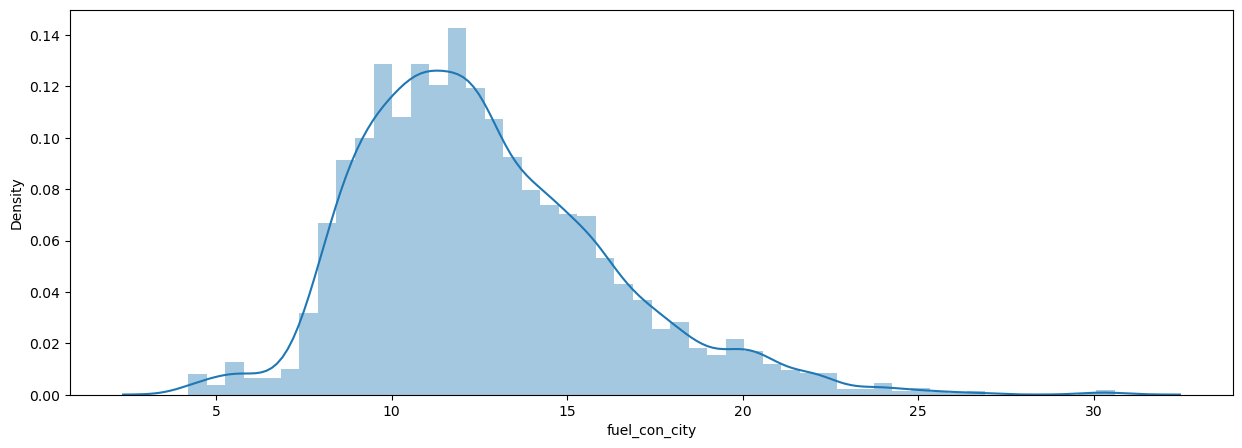

fuel_con_hwy


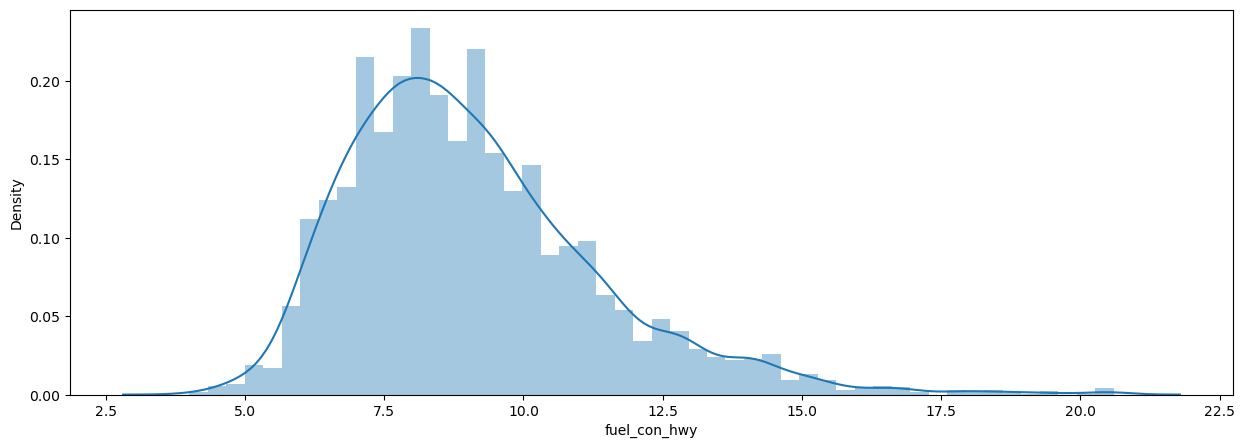

fl_con_comb(l/100km)


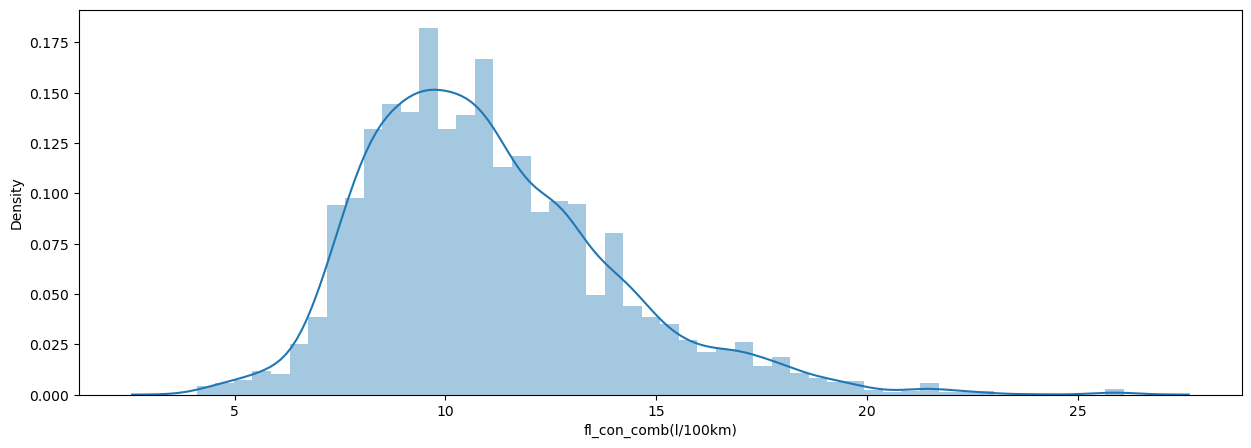

fl_con_comb(mpg)


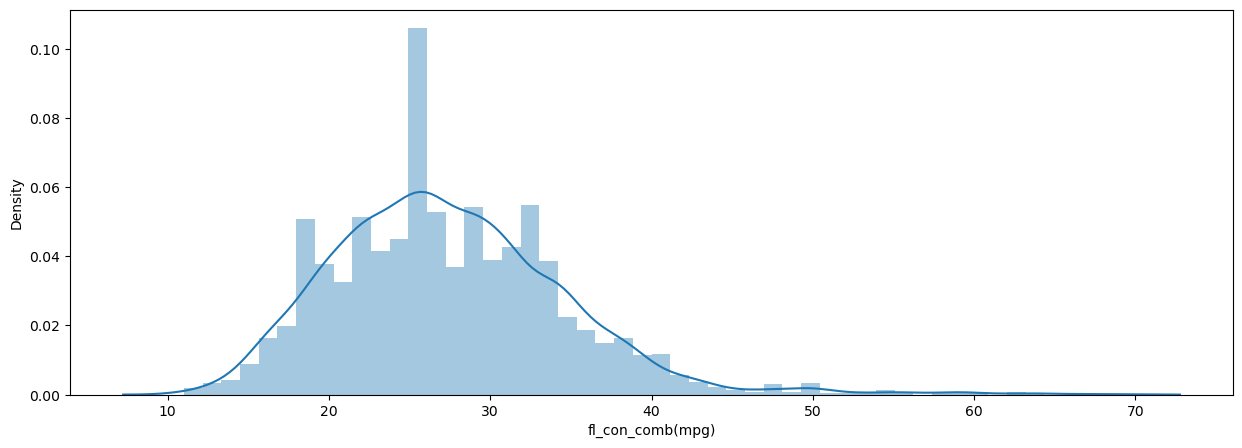

co2_emissions


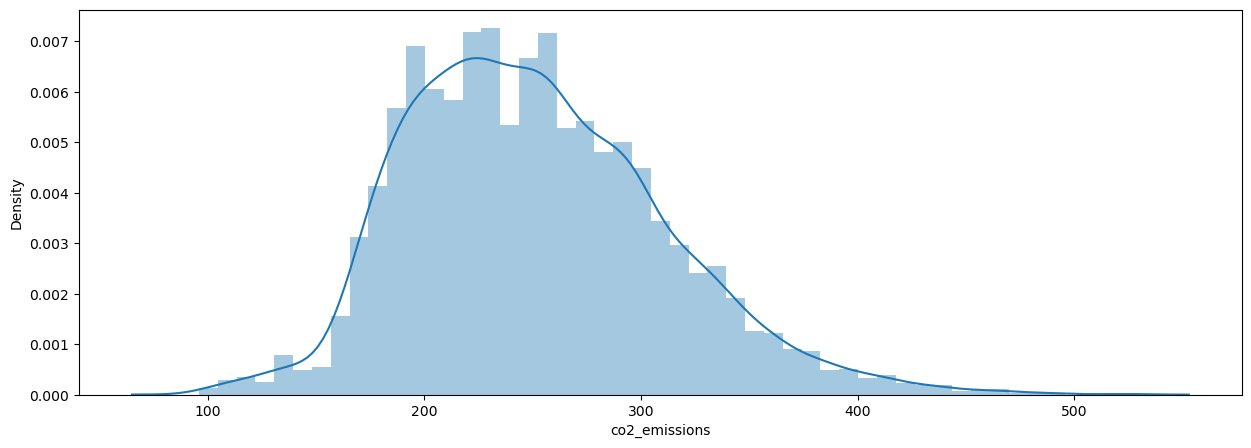

In [17]:
#Distplot
#check the data distribution in each numerical columns
for i in numerical_features:
    print(i)
    plt.figure(figsize=(15,5))
    sns.distplot(df[i])
    plt.show()
    

### Brand of cars

In [18]:
print('we have total',len(df['make'].unique()),'car companies data')
df_brand=df['make'].value_counts().reset_index().rename(columns={'make':'Count','index':'Make'})
df_brand.head(20)

we have total 42 car companies data


,Make,Count
0,FORD,575
1,CHEVROLET,515
2,BMW,501
3,MERCEDES-BENZ,365
4,PORSCHE,296
5,GMC,289
6,TOYOTA,274
7,AUDI,263
8,NISSAN,213
9,MINI,200


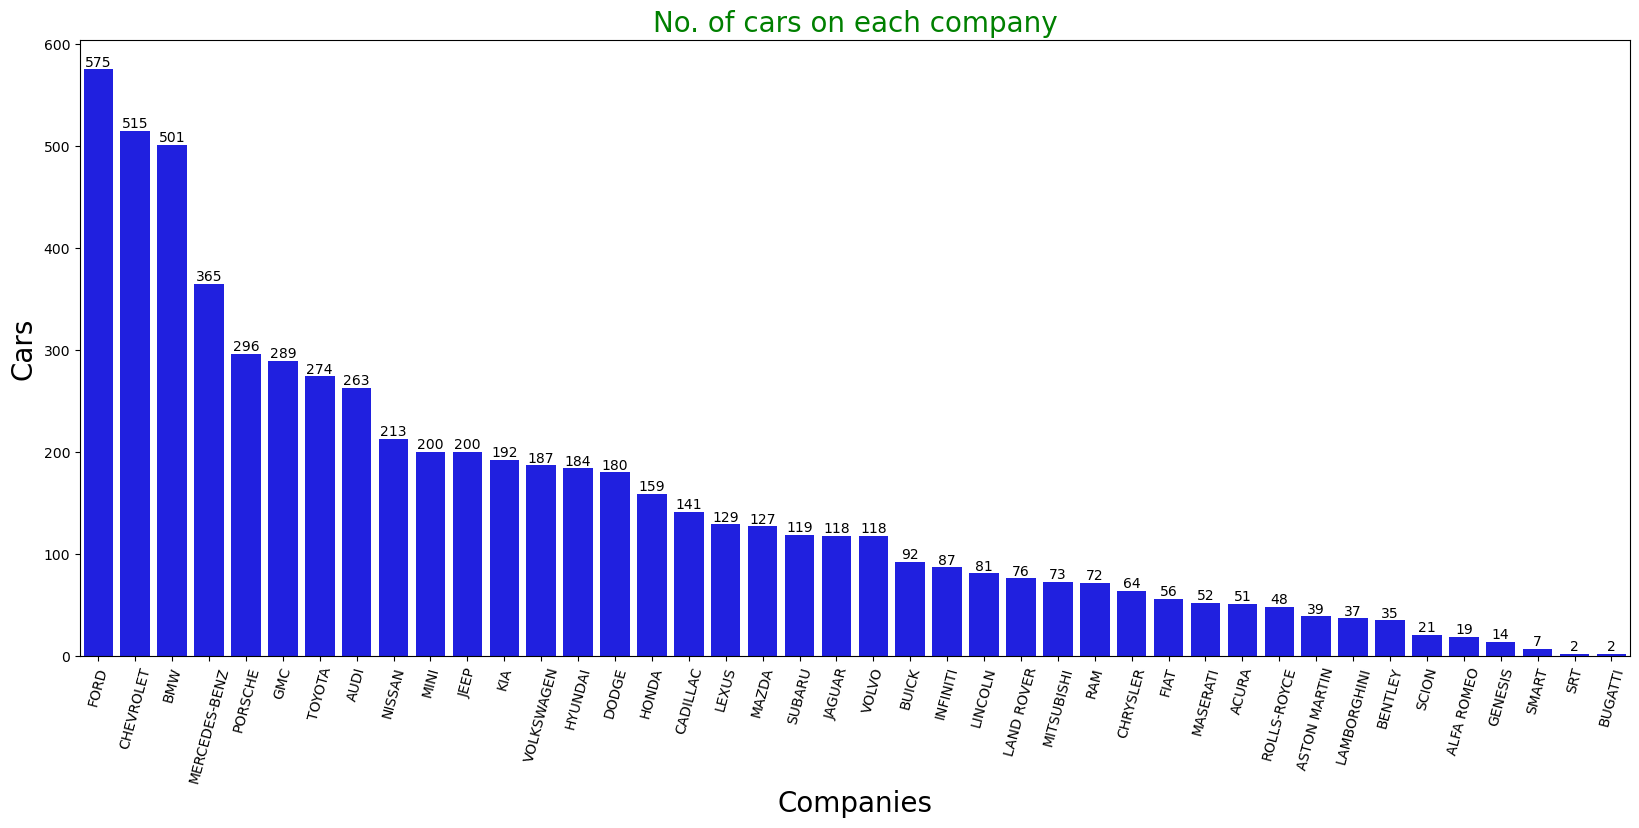

In [19]:
plt.figure(figsize=(20,8))
Brands=sns.barplot(data=df_brand,x='Make',y='Count',color='blue')
plt.xticks(rotation=75)
plt.title('No. of cars on each company',color='green',fontdict={'fontsize':20})
plt.xlabel('Companies',fontdict={'fontsize':20})
plt.ylabel('Cars',fontdict={'fontsize':20})
plt.bar_label(Brands.containers[0])
plt.show()

### Models of cars

In [20]:
print('we have total',len(df['model'].unique()),'models')
df_model=df['model'].value_counts().reset_index().rename(columns={'index':'Model','model':'Count'})[:25]
df_model.head(10)

we have total 2053 models


,Model,Count
0,F-150 FFV,32
1,F-150 FFV 4X4,31
2,MUSTANG,26
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,SONIC 5,18
7,ATS,18
8,JETTA,18
9,COMPASS,18


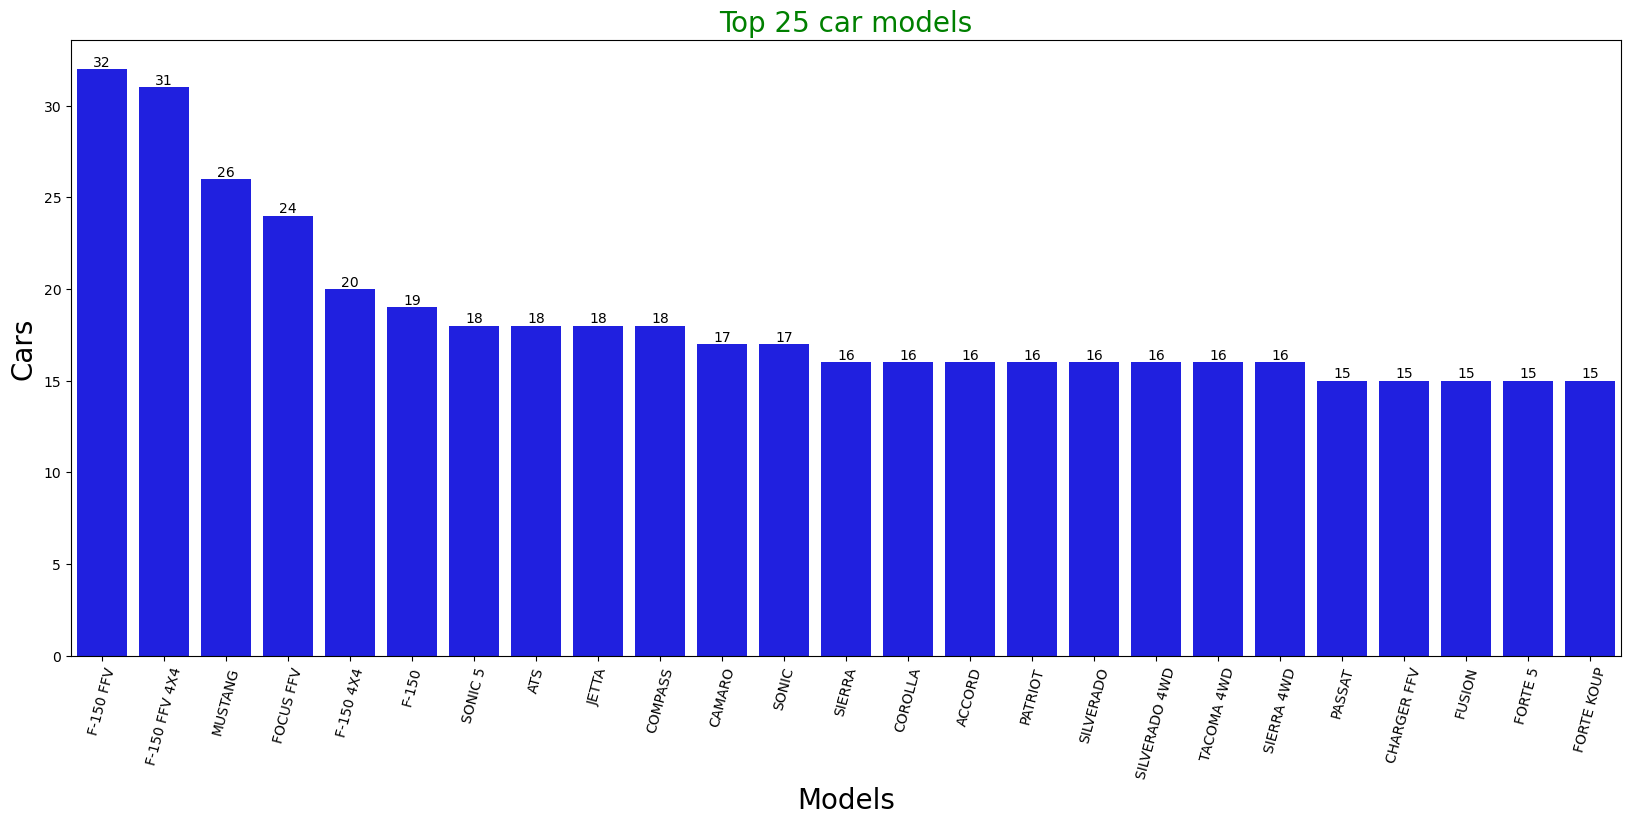

In [21]:
plt.figure(figsize=(20,8))
Models=sns.barplot(data=df_model,x='Model',y='Count',color='blue')
plt.xticks(rotation=75)
plt.title('Top 25 car models',color='green',fontdict={'fontsize':20})
plt.xlabel('Models',fontdict={'fontsize':20})
plt.ylabel('Cars',fontdict={'fontsize':20})
plt.bar_label(Models.containers[0])
plt.show()

### Vehicle_class

In [22]:
#check the Vehicle_class and no. of cars under each vehicle_class
print('we have total',len(df['vehicle_class'].unique()),'vehicle_class')
df_class=df['vehicle_class'].value_counts().reset_index().rename(columns={'index':'vehicle_class','vehicle_class':'Count'})
df_class

we have total 16 vehicle_class


,vehicle_class,Count
0,SUV - SMALL,1004
1,MID-SIZE,981
2,COMPACT,902
3,SUV - STANDARD,613
4,SUBCOMPACT,532
5,FULL-SIZE,508
6,PICKUP TRUCK - STANDARD,474
7,TWO-SEATER,381
8,MINICOMPACT,274
9,STATION WAGON - SMALL,212


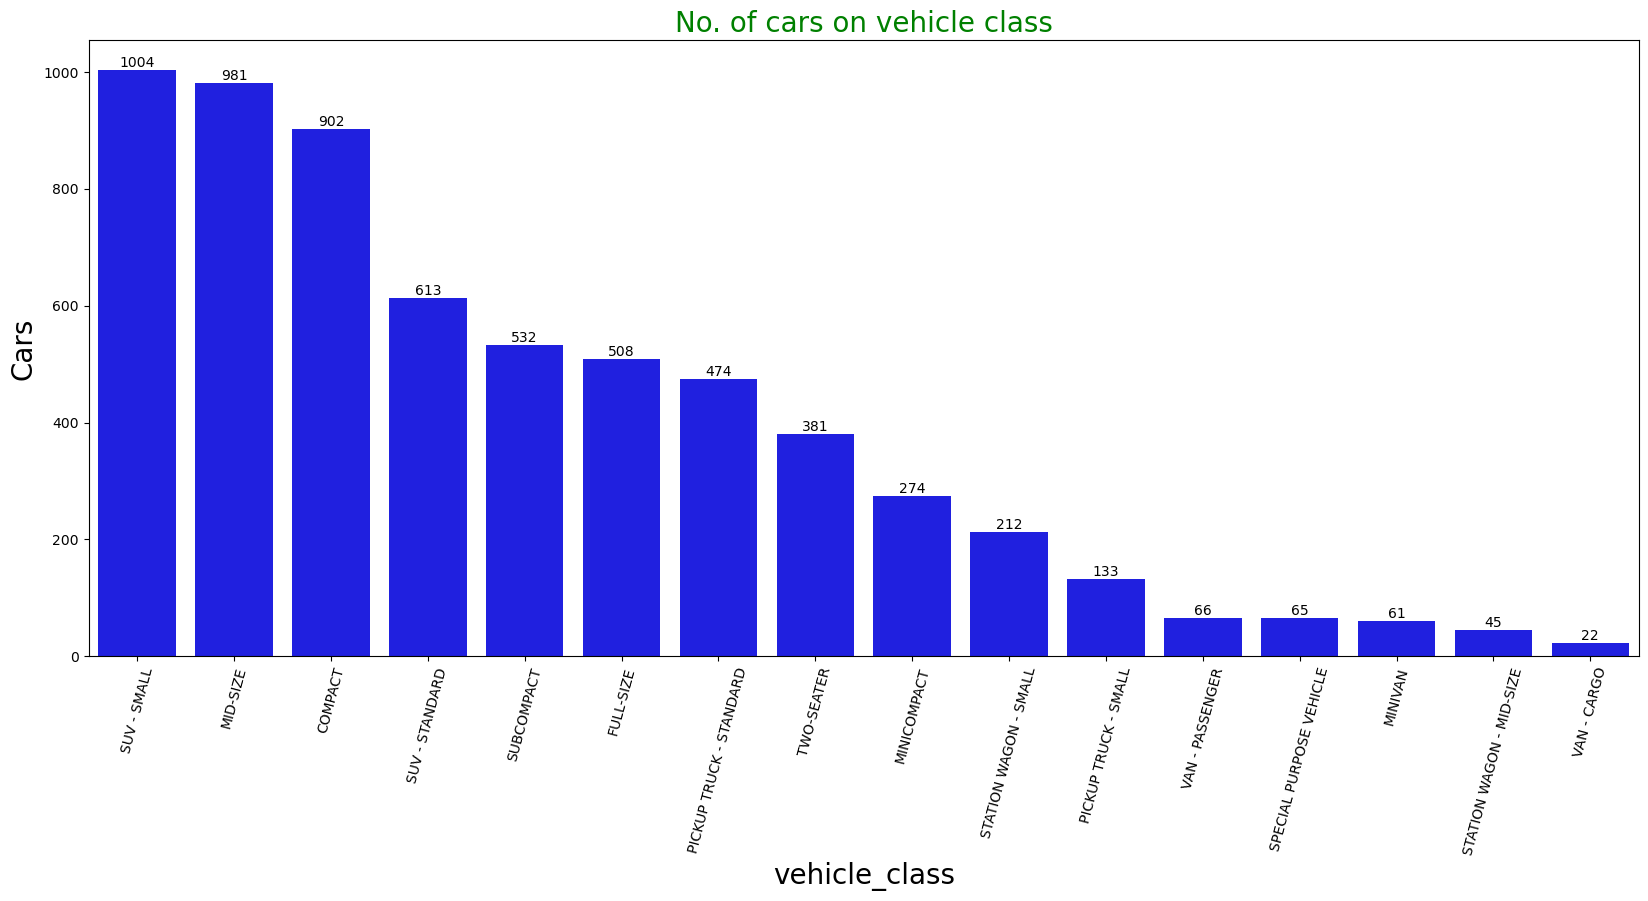

In [23]:
plt.figure(figsize=(20,8))
vehicle_class=sns.barplot(data=df_class,x='vehicle_class',y='Count',color='blue')
plt.xticks(rotation=75)
plt.title('No. of cars on vehicle class',color='green',fontdict={'fontsize':20})
plt.xlabel('vehicle_class',fontdict={'fontsize':20})
plt.ylabel('Cars',fontdict={'fontsize':20})
plt.bar_label(vehicle_class.containers[0])
plt.show()

In [24]:
#check the fuel types and no. of cars under each fuel type
#"X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'.
df['fuel_type'].value_counts()

X    3030
Z    2765
E     330
D     147
N       1
Name: fuel_type, dtype: int64

In [25]:
#check the transmission and no. of cars under each transmission
df['transmission'].value_counts()


AS    2720
A     1536
M     1019
AM     540
AV     458
Name: transmission, dtype: int64

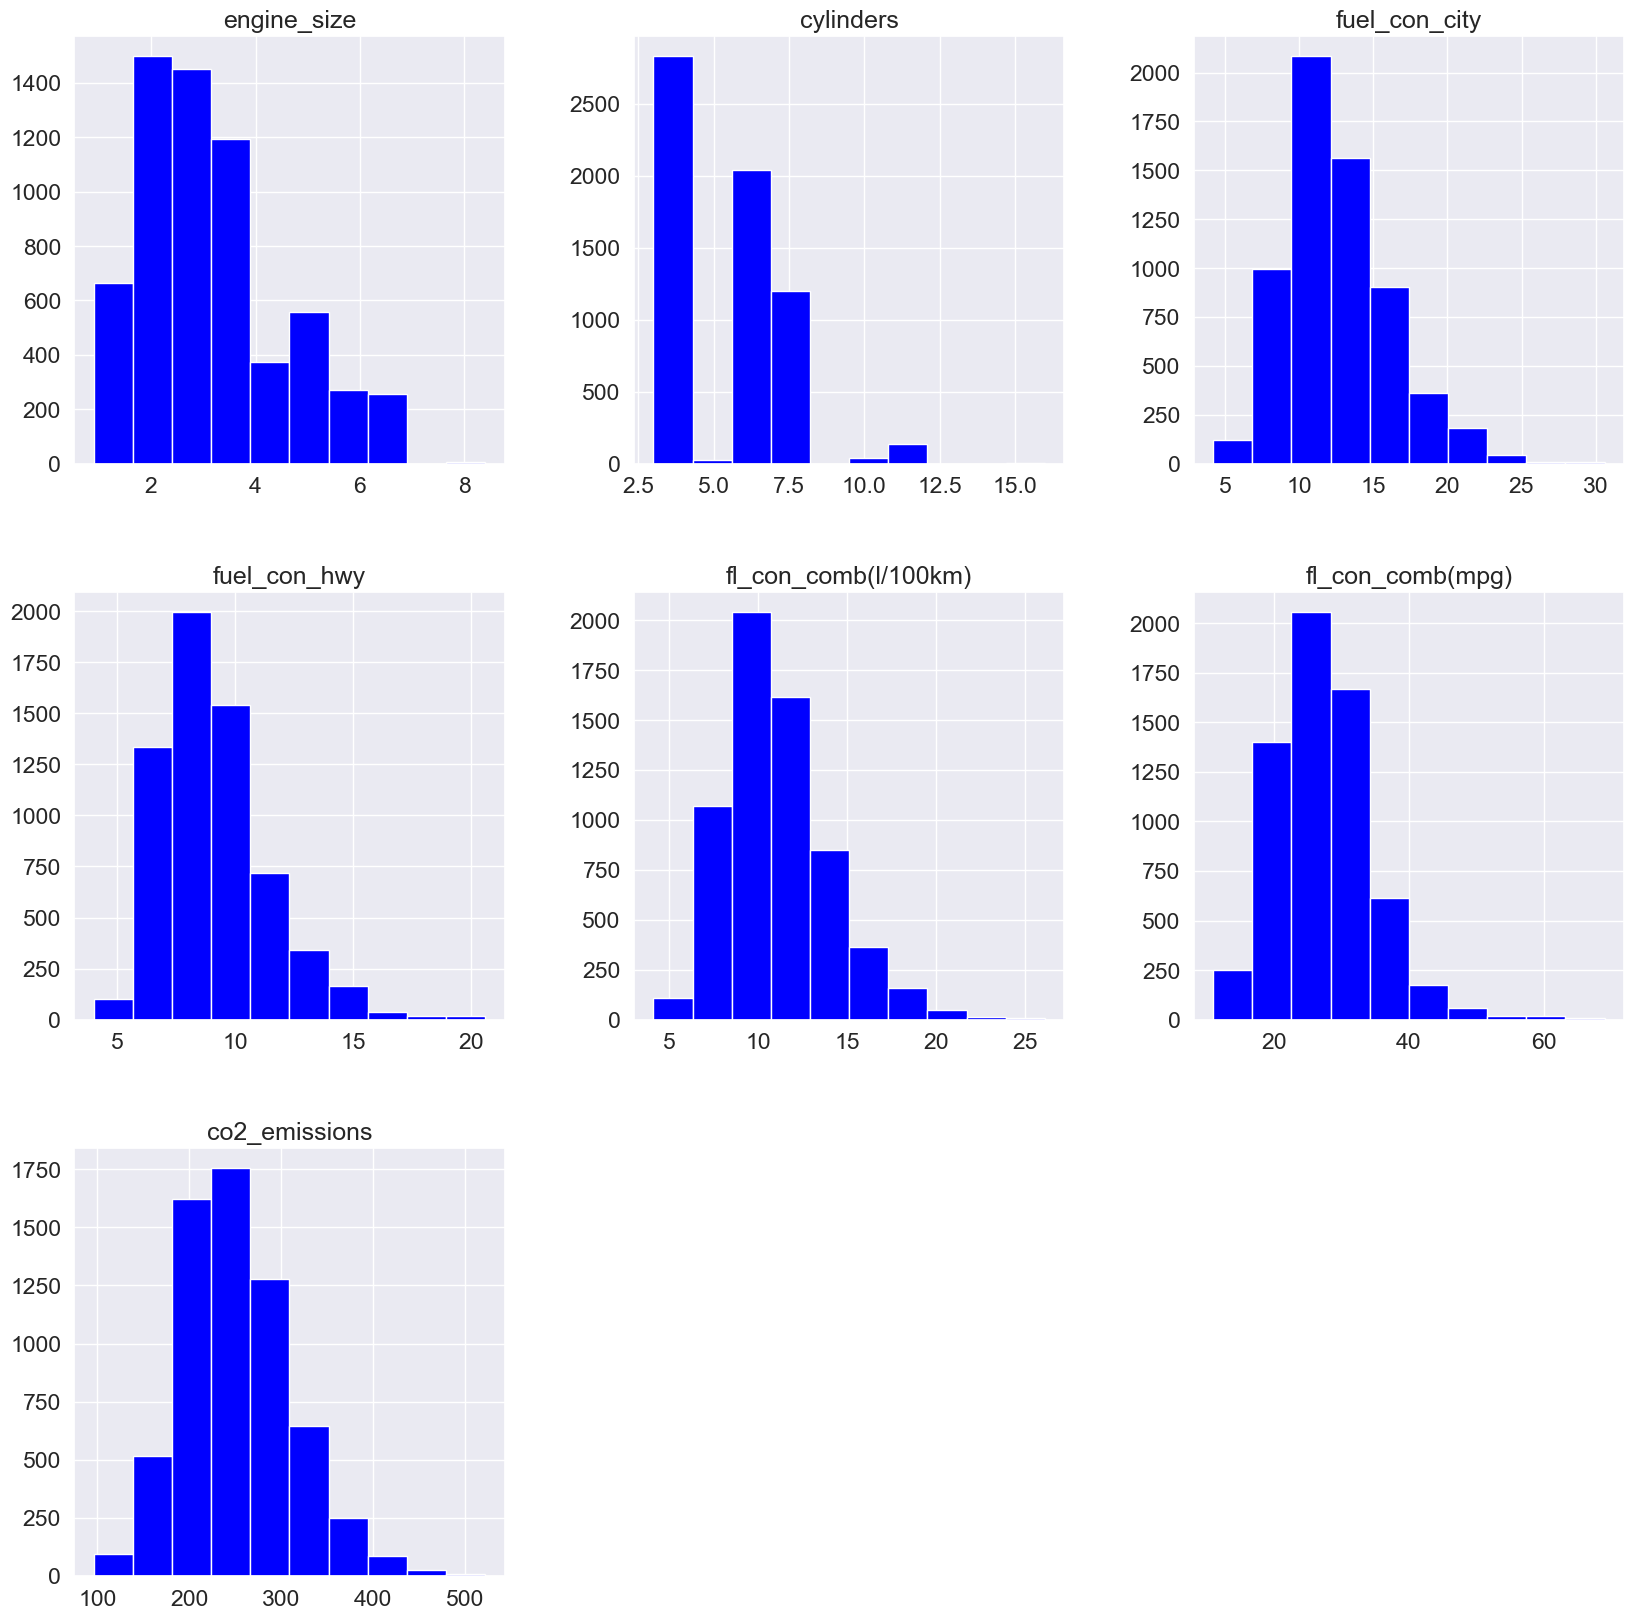

In [26]:
#histogram
#check the frequency distrubution of each numerical column using histplot
sns.set(style='dark',font_scale=1.5,rc={'figure.figsize':(20,20)})
df.hist(bins=10,color='blue')
plt.show()

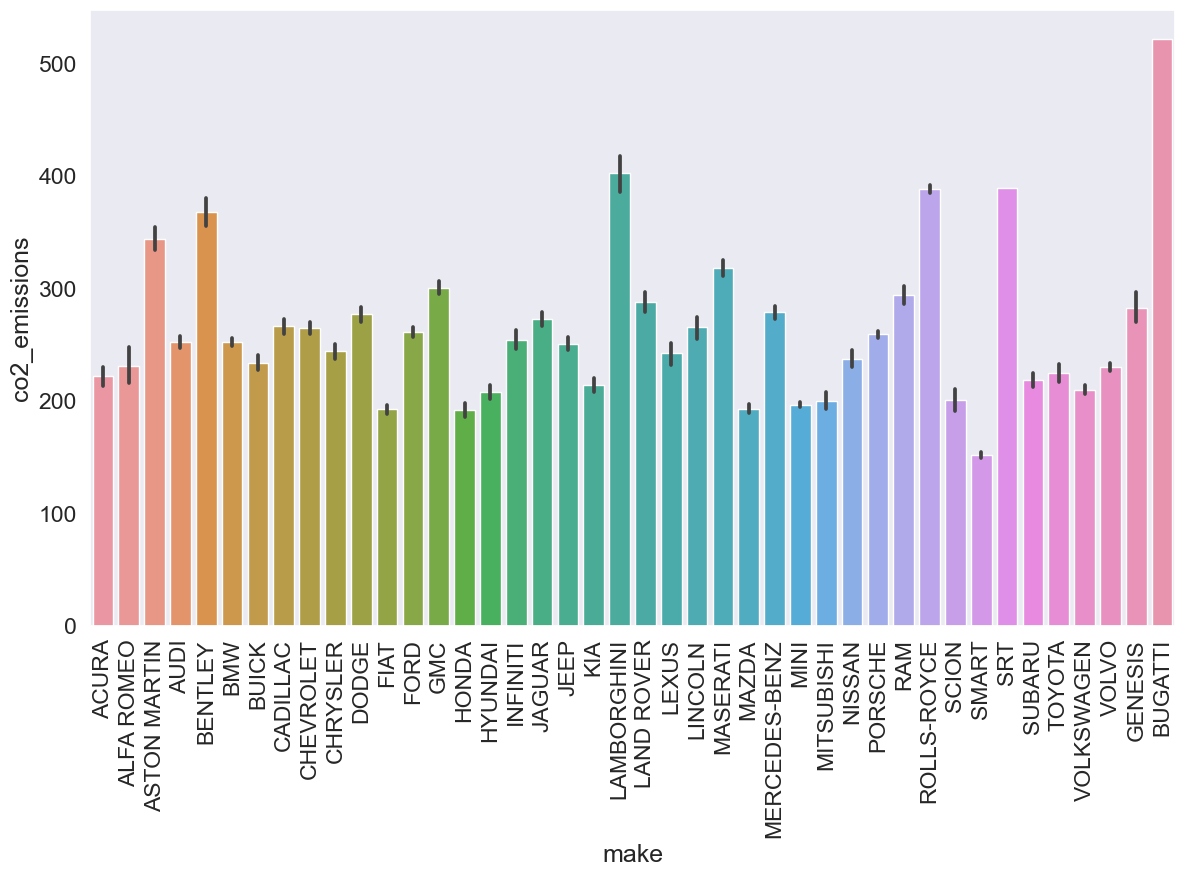

In [27]:
#check the which car brands are emit more co2 emission
plt.figure(figsize=(14,8))
sns.barplot(x=df['make'], y=df['co2_emissions'])
plt.xticks(rotation=90)
plt.show()

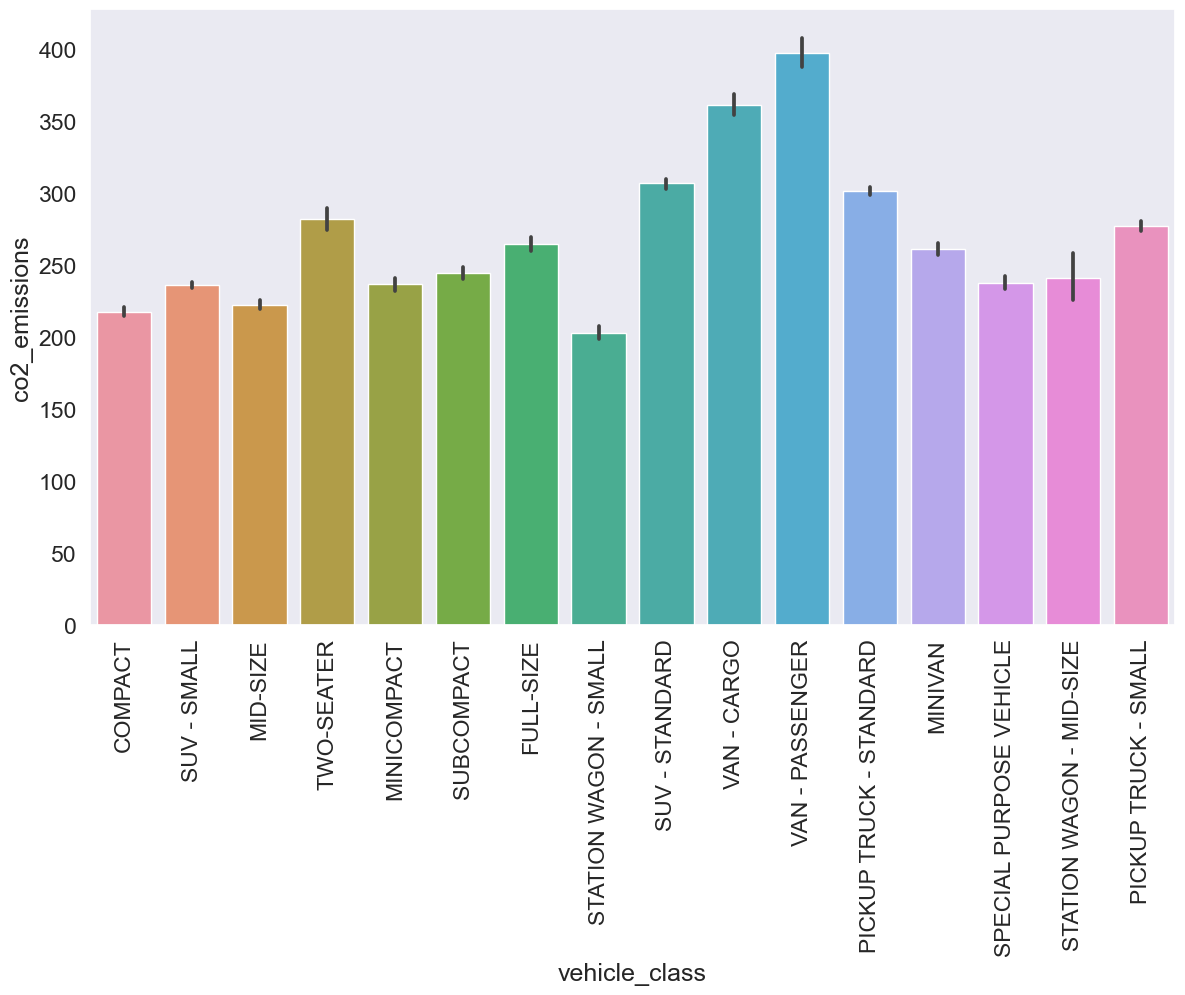

In [28]:
#check the which type vehicles are emit more co2 emission
plt.figure(figsize=(14,8))
sns.barplot(x=df['vehicle_class'], y=df['co2_emissions'])
plt.xticks(rotation=90)
plt.show()

In [29]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_con_city', 'fuel_con_hwy',
       'fl_con_comb(l/100km)', 'fl_con_comb(mpg)', 'co2_emissions'],
      dtype='object')

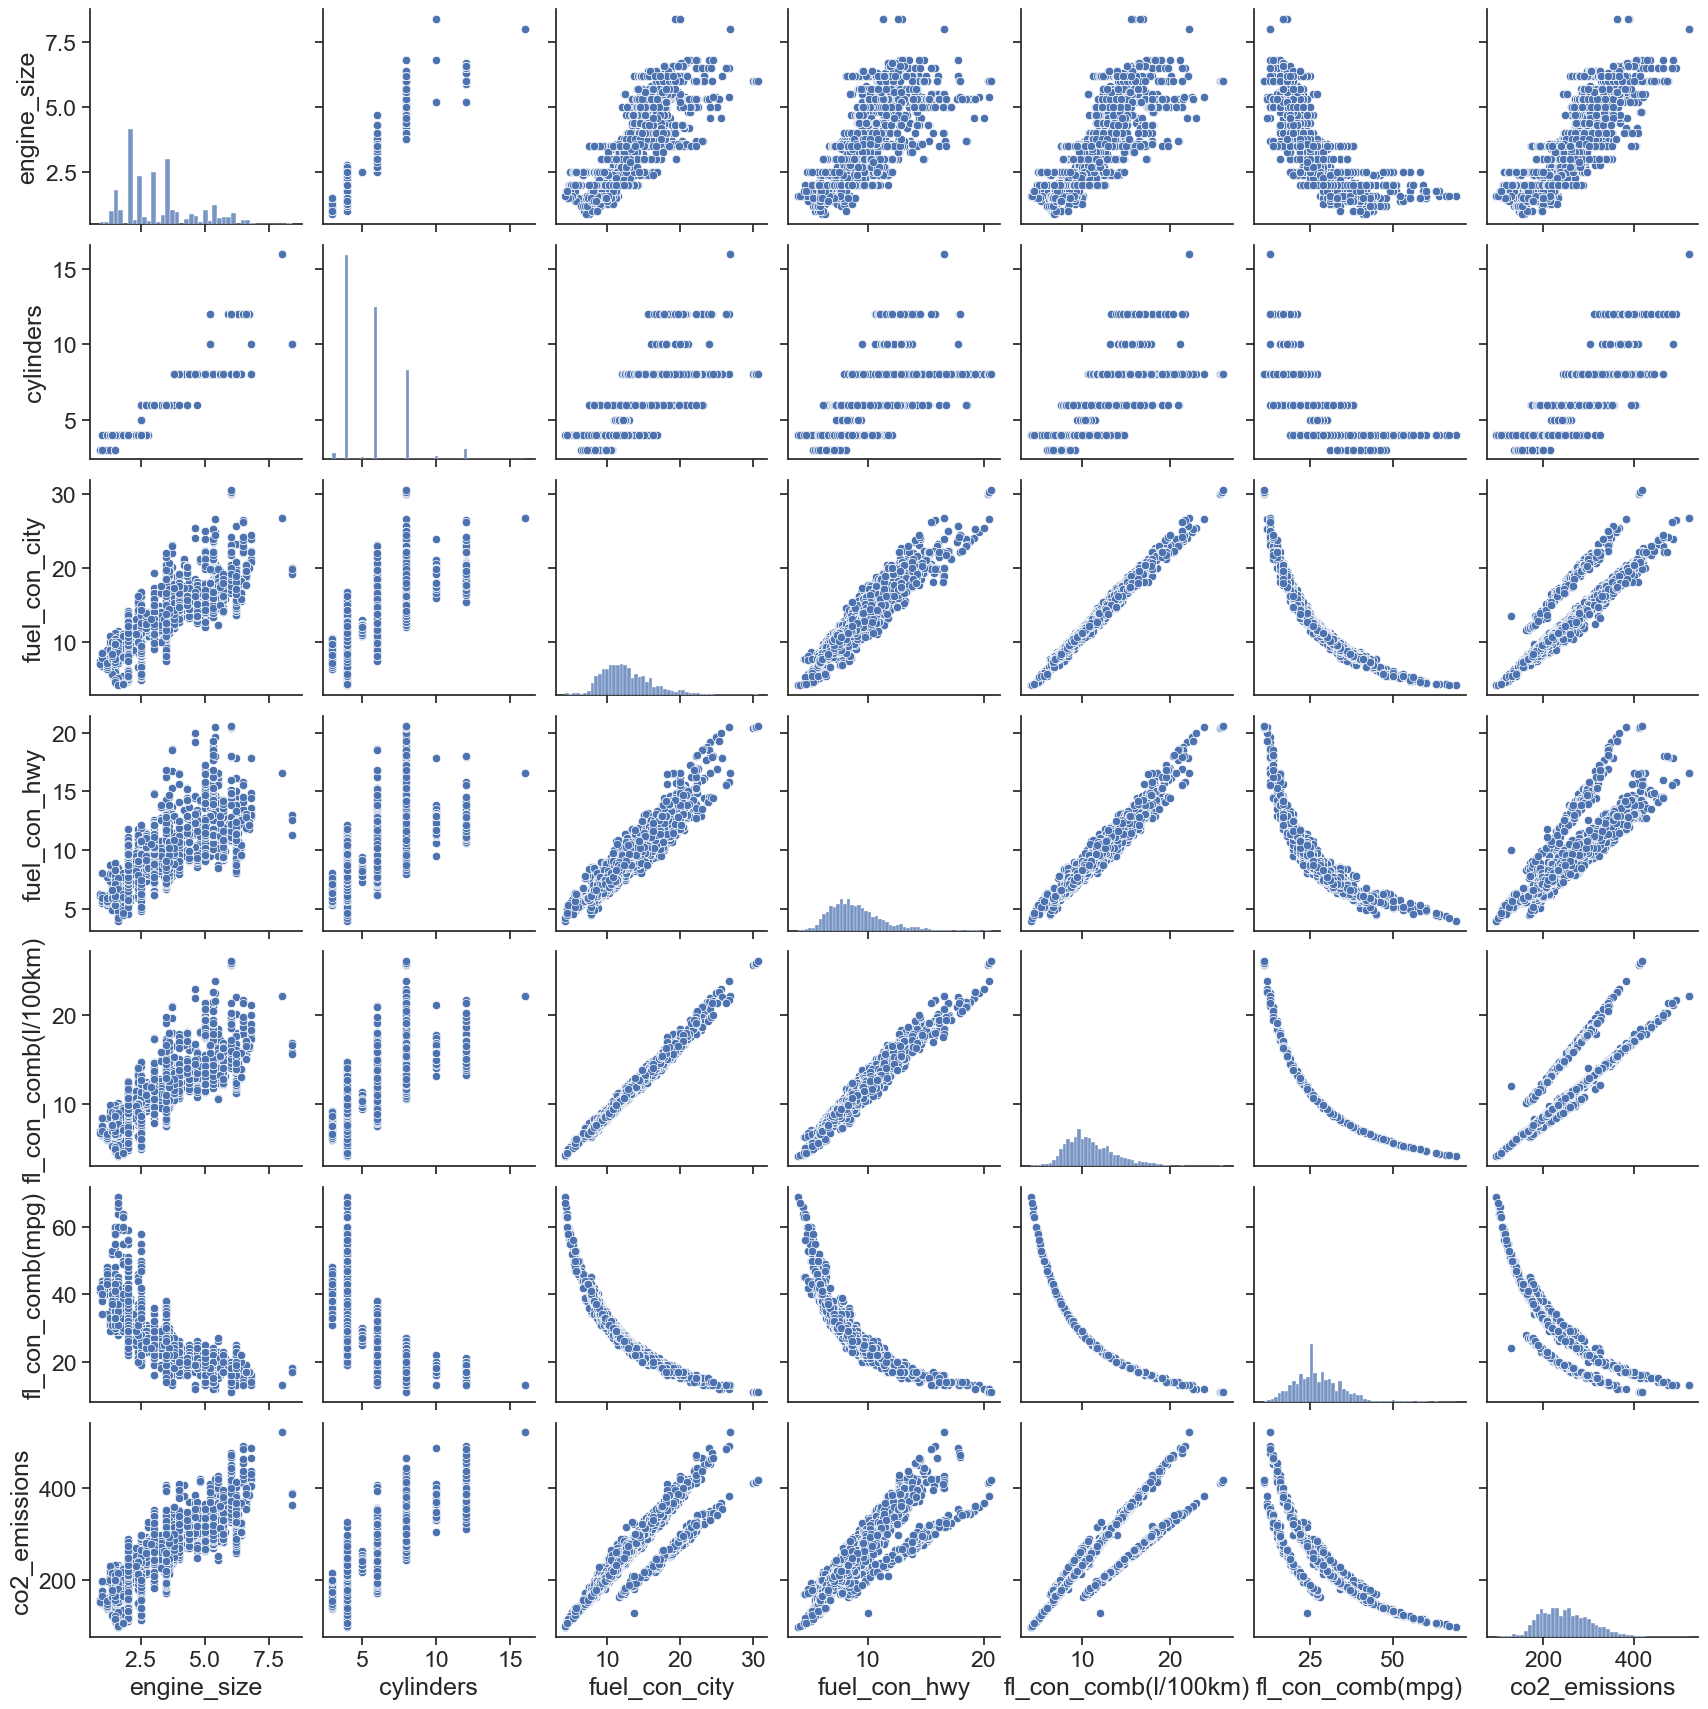

In [30]:
#check the pairwise realtionship in datset using pairplot
sns.set_style(style='ticks')
sns.pairplot(df)

<Axes: >

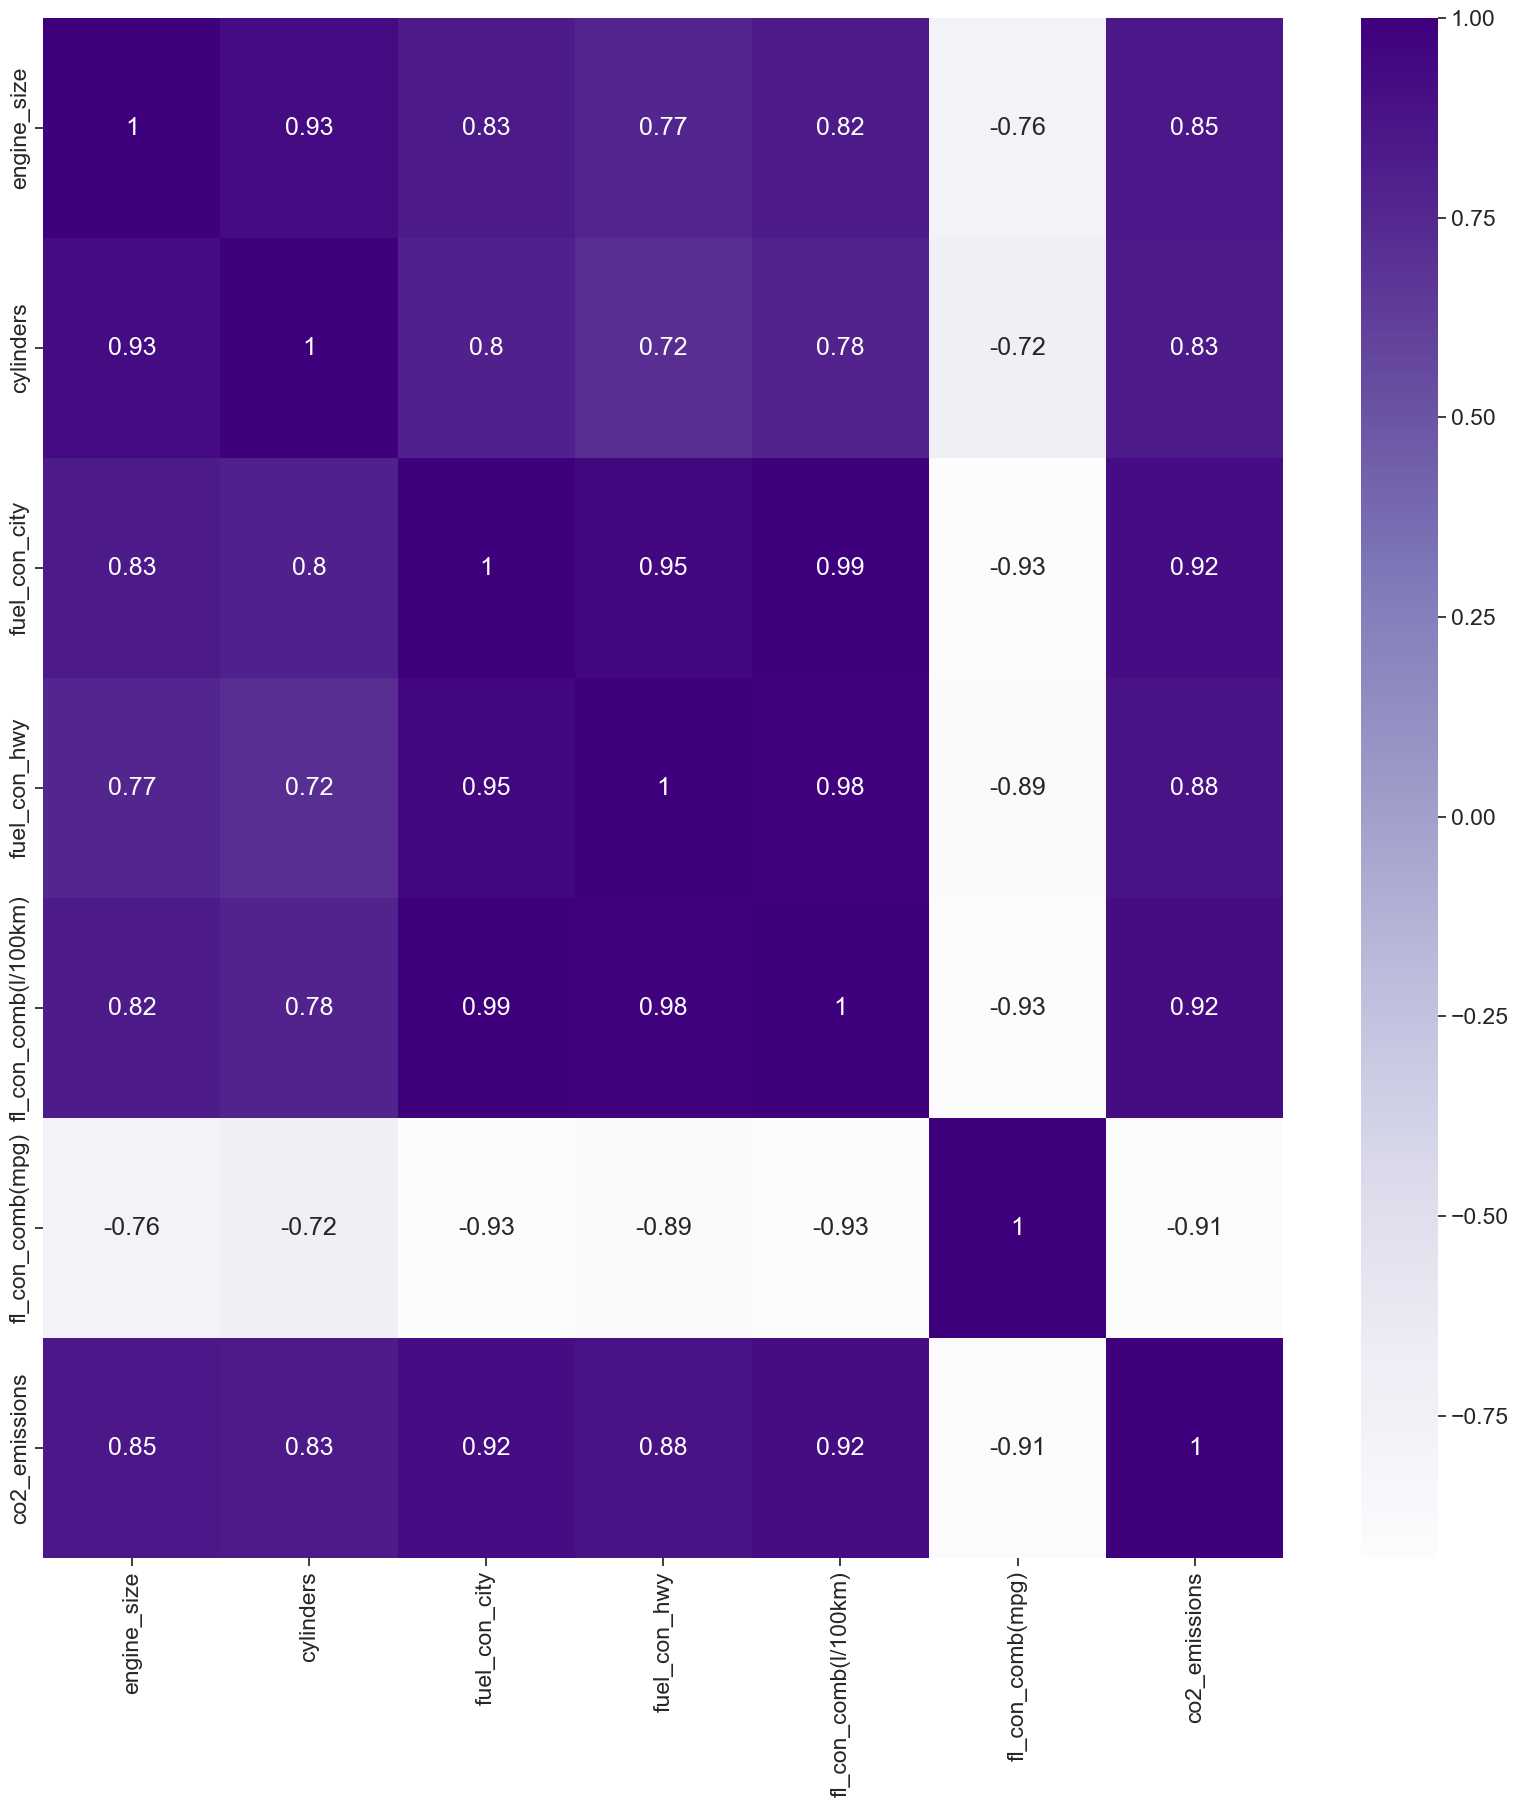

In [31]:
#check the correlation b/w variebles
sns.heatmap(df.corr() ,annot=True,cmap='Purples')

<font color='green'> <font size='5'>**Outliers Detection** </font> 

In [32]:
# Detect observations with more than one outlier
from collections import Counter

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # upper bound
        upper_bound=Q3+(1.5*IQR)
        # lower bound 
        lower_bound=Q1-(1.5*IQR)
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < lower_bound) | (df[col] > upper_bound )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers  

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features])))) 


The dataset contains 117 observations with more than 2 outliers


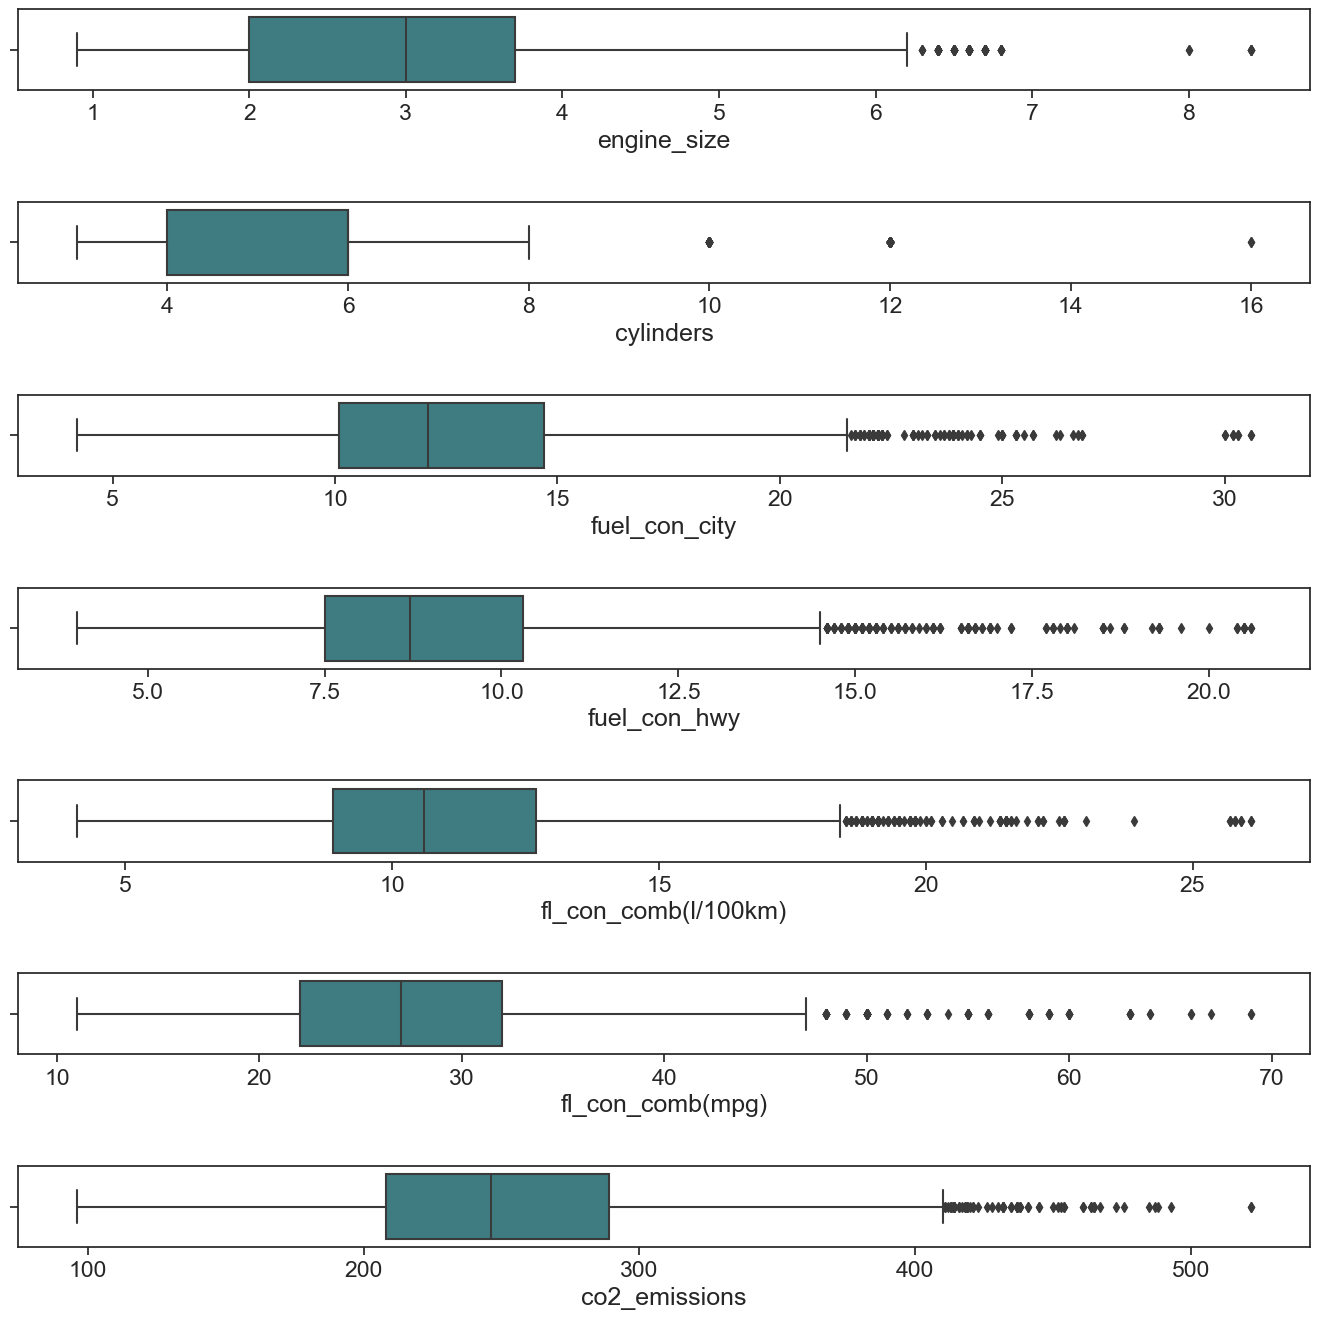

In [33]:
#let's check in boxplot
ot=df.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,14),sharex=False,sharey=False)
sns.boxplot(x='engine_size',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='cylinders',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='fuel_con_city',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='fuel_con_hwy',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='fl_con_comb(l/100km)',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='fl_con_comb(mpg)',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='co2_emissions',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

#### Lots of outliers present in the data set we can't remove them ,because they also have important information and important to model building and prediction.

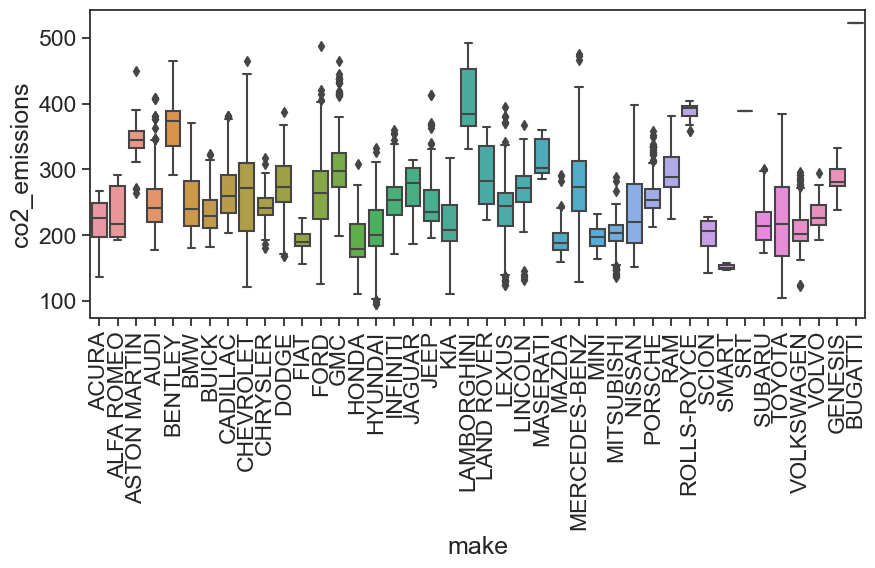

In [34]:
#boxplot for make
plt.figure(figsize=(10,4))
sns.boxplot(x='make',y='co2_emissions',data=ot)
plt.xticks(rotation=90)
plt.show()

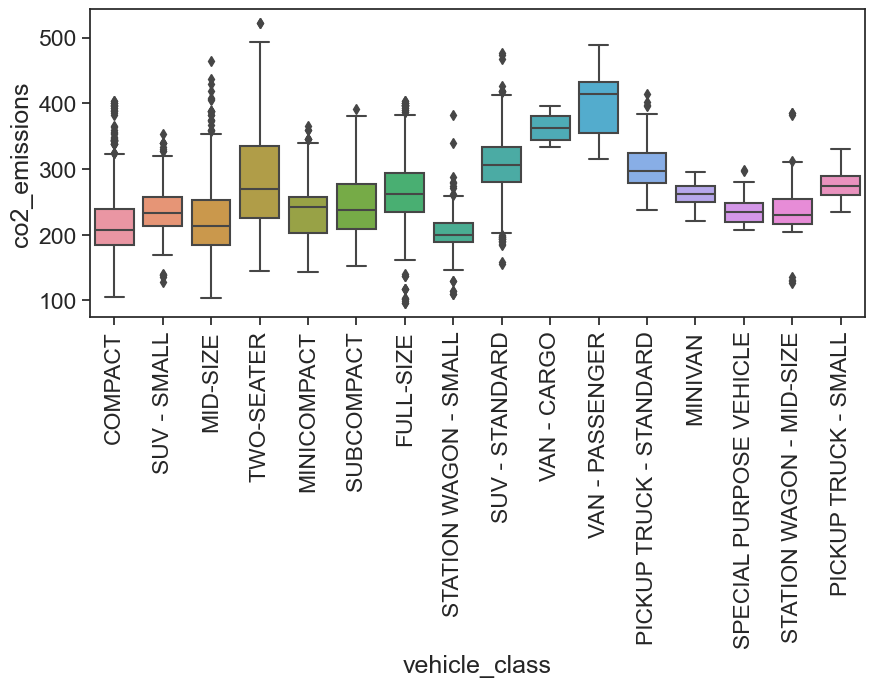

In [35]:
plt.figure(figsize=(10,4))
sns.boxplot(x='vehicle_class',y='co2_emissions',data=ot)
plt.xticks(rotation=90)
plt.show()

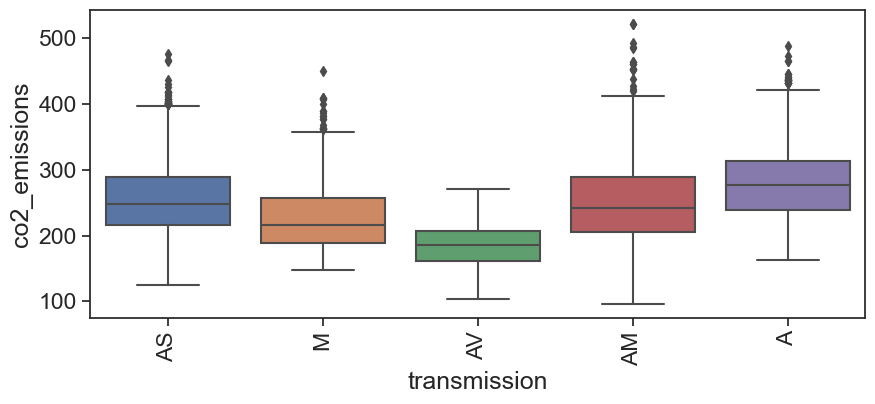

In [36]:
plt.figure(figsize=(10,4))
sns.boxplot(x='transmission',y='co2_emissions',data=ot)
plt.xticks(rotation=90)
plt.show()

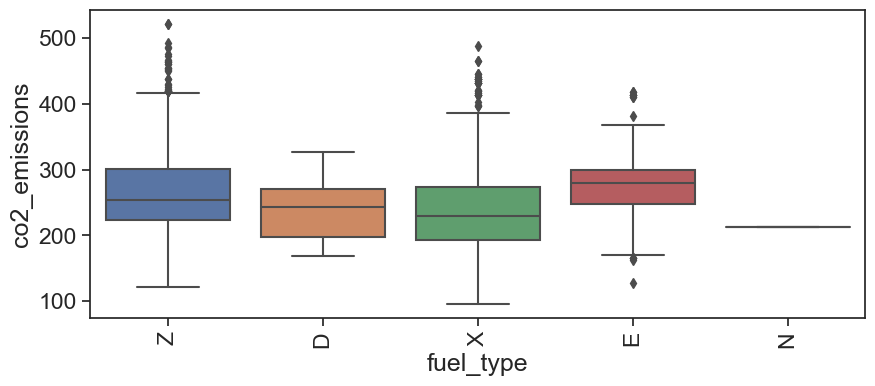

In [37]:
plt.figure(figsize=(10,4))
sns.boxplot(x='fuel_type',y='co2_emissions',data=ot)
plt.xticks(rotation=90)
plt.show()

 <font color='green'> <font size='5'>**Conclution of EDA**</font>


<font size='3'> **1. There are total 42 types of car brand.**</font>
    
<font size='3'> **2. There are total 2053 unique car model. These neither can be converted into any dummy variable nor it can be used for analysis. So we can drop this column.**</font>
    
<font size='3'> **3. There are total 16 types of vehicle class.**</font>
    
<font size='3'> **4. There are 5 types of transmission, they does not affect CO2 emissions.**</font>
    
<font size='3'> **5. 5 type of Fuel Types is there.**</font>
    
<font size='3'> **6. We have only one data on natural gas. So we cannot predict anything using only one data. That's why we have to drop this row.**</font>

<font color='red'><font size='5'>**Data Cleaning**</font>

In [38]:
#Apply the VIF for multicollinearity check
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

numerical_features = ['engine_size', 'cylinders', 'fuel_con_city', 'fuel_con_hwy', 'fl_con_comb(l/100km)', 'fl_con_comb(mpg)']

# Separate numerical features and scale them
X_numerical = df[numerical_features]
X_numerical_scaled = StandardScaler().fit_transform(X_numerical)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical_scaled, i) for i in range(X_numerical_scaled.shape[1])]

# Display the result
print(vif_data)


                feature          VIF
0           engine_size     8.759911
1             cylinders     7.718799
2         fuel_con_city  2221.757014
3          fuel_con_hwy   623.065553
4  fl_con_comb(l/100km)  5038.416323
5      fl_con_comb(mpg)     7.300977


In [39]:
#removing the highly correlated two features.
data=df.copy()
data=data.drop(['fuel_con_city','fuel_con_hwy'],axis=1)


In [40]:
#then again check the VIF lets see the result
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


numerical_features = ['engine_size', 'cylinders',  'fl_con_comb(l/100km)', 'fl_con_comb(mpg)']

# Separate numerical features and scale them
X_numerical = data[numerical_features]
X_numerical_scaled = StandardScaler().fit_transform(X_numerical)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical_scaled, i) for i in range(X_numerical_scaled.shape[1])]

# Display the result
print(vif_data)

                feature       VIF
0           engine_size  8.757964
1             cylinders  7.344218
2  fl_con_comb(l/100km)  8.982200
3      fl_con_comb(mpg)  7.032351


#### In general, a VIF value greater than 10 is often considered a sign of significant multicollinearity. but now see above vif values all 4 values are less than 10.

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your dataset is named 'data'
# 'data' contains your dataset with columns as described

# Perform ANOVA for each categorical variable
categorical_columns = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

for col in categorical_columns:
    formula = f'co2_emissions ~ C({col})'  # C() indicates categorical variable
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA results for {col}:\n{anova_table}\n")


ANOVA results for make:
                sum_sq      df          F  PR(>F)
C(make)   8.156474e+06    41.0  89.494768     0.0
Residual  1.385092e+07  6231.0        NaN     NaN

ANOVA results for model:
                sum_sq      df          F  PR(>F)
C(model)  2.106787e+07  2052.0  46.115628     0.0
Residual  9.395235e+05  4220.0        NaN     NaN

ANOVA results for vehicle_class:
                        sum_sq      df           F  PR(>F)
C(vehicle_class)  7.940908e+06    15.0  235.482926     0.0
Residual          1.406649e+07  6257.0         NaN     NaN

ANOVA results for transmission:
                       sum_sq      df           F         PR(>F)
C(transmission)  3.785869e+06     4.0  325.574065  6.237286e-255
Residual         1.822153e+07  6268.0         NaN            NaN

ANOVA results for fuel_type:
                    sum_sq      df           F        PR(>F)
C(fuel_type)  1.515719e+06     4.0  115.907108  1.621428e-95
Residual      2.049168e+07  6268.0         NaN           Na

In [42]:
data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fl_con_comb(l/100km),fl_con_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,9.4,30,219
6269,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,9.9,29,232
6270,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,10.3,27,240
6271,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,9.9,29,232


### We have to remove Natural Gass data from our data set. Because we can predict anything by only use one record.

In [43]:
df_natural=data[data['fuel_type']=='N']

In [44]:
df_natural

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fl_con_comb(l/100km),fl_con_comb(mpg),co2_emissions
2232,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS,N,12.7,22,213


In [45]:
# removing natural gas from the dataset
data.drop(df_natural.index,axis=0,inplace=True)

In [46]:
data[data['fuel_type']=='N']

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fl_con_comb(l/100km),fl_con_comb(mpg),co2_emissions


In [47]:
#Removing the  'model' feature because of lots of unique categorical values
data=data.drop(['model'],axis=1)
data

,make,vehicle_class,engine_size,cylinders,transmission,fuel_type,fl_con_comb(l/100km),fl_con_comb(mpg),co2_emissions
0,ACURA,COMPACT,2.0,4,AS,Z,8.5,33,196
1,ACURA,COMPACT,2.4,4,M,Z,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV,Z,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS,Z,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS,Z,10.6,27,244
...,...,...,...,...,...,...,...,...,...
6268,VOLVO,SUV - SMALL,2.0,4,AS,Z,9.4,30,219
6269,VOLVO,SUV - SMALL,2.0,4,AS,Z,9.9,29,232
6270,VOLVO,SUV - SMALL,2.0,4,AS,Z,10.3,27,240
6271,VOLVO,SUV - STANDARD,2.0,4,AS,Z,9.9,29,232


In [48]:
# one hot encoding to top 5 most co2 emitted car 'make' feature,
# because if we select all 42 features,then dimensonality of datset is increas significantly, it causes to overfitting
data1=pd.get_dummies(data,columns=['make'])
data2=data1[['vehicle_class','engine_size','cylinders','transmission','fuel_type','fl_con_comb(l/100km)','fl_con_comb(mpg)','co2_emissions','make_BUGATTI','make_SRT','make_ROLLS-ROYCE','make_LAMBORGHINI','make_BENTLEY']]
data2

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fl_con_comb(l/100km),fl_con_comb(mpg),co2_emissions,make_BUGATTI,make_SRT,make_ROLLS-ROYCE,make_LAMBORGHINI,make_BENTLEY
0,COMPACT,2.0,4,AS,Z,8.5,33,196,0,0,0,0,0
1,COMPACT,2.4,4,M,Z,9.6,29,221,0,0,0,0,0
2,COMPACT,1.5,4,AV,Z,5.9,48,136,0,0,0,0,0
3,SUV - SMALL,3.5,6,AS,Z,11.1,25,255,0,0,0,0,0
4,SUV - SMALL,3.5,6,AS,Z,10.6,27,244,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,SUV - SMALL,2.0,4,AS,Z,9.4,30,219,0,0,0,0,0
6269,SUV - SMALL,2.0,4,AS,Z,9.9,29,232,0,0,0,0,0
6270,SUV - SMALL,2.0,4,AS,Z,10.3,27,240,0,0,0,0,0
6271,SUV - STANDARD,2.0,4,AS,Z,9.9,29,232,0,0,0,0,0


In [49]:
# one hot encoding to top 5 most co2 emitted  'vehicle_class' feature 
data3=pd.get_dummies(data2,columns=['vehicle_class'])
data4=data3[['engine_size','cylinders','transmission','fuel_type','fl_con_comb(l/100km)','fl_con_comb(mpg)','co2_emissions',
             'make_BUGATTI','make_SRT','make_ROLLS-ROYCE','make_LAMBORGHINI','make_BENTLEY',
            'vehicle_class_VAN - PASSENGER','vehicle_class_VAN - CARGO','vehicle_class_PICKUP TRUCK - STANDARD',
             'vehicle_class_SUV - STANDARD','vehicle_class_TWO-SEATER']]
data4

,engine_size,cylinders,transmission,fuel_type,fl_con_comb(l/100km),fl_con_comb(mpg),co2_emissions,make_BUGATTI,make_SRT,make_ROLLS-ROYCE,make_LAMBORGHINI,make_BENTLEY,vehicle_class_VAN - PASSENGER,vehicle_class_VAN - CARGO,vehicle_class_PICKUP TRUCK - STANDARD,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER
0,2.0,4,AS,Z,8.5,33,196,0,0,0,0,0,0,0,0,0,0
1,2.4,4,M,Z,9.6,29,221,0,0,0,0,0,0,0,0,0,0
2,1.5,4,AV,Z,5.9,48,136,0,0,0,0,0,0,0,0,0,0
3,3.5,6,AS,Z,11.1,25,255,0,0,0,0,0,0,0,0,0,0
4,3.5,6,AS,Z,10.6,27,244,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,2.0,4,AS,Z,9.4,30,219,0,0,0,0,0,0,0,0,0,0
6269,2.0,4,AS,Z,9.9,29,232,0,0,0,0,0,0,0,0,0,0
6270,2.0,4,AS,Z,10.3,27,240,0,0,0,0,0,0,0,0,0,0
6271,2.0,4,AS,Z,9.9,29,232,0,0,0,0,0,0,0,0,1,0


In [50]:
#check the df.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False)

In [51]:
final_data=pd.get_dummies(data4,columns=['transmission','fuel_type'])
final_data

,engine_size,cylinders,fl_con_comb(l/100km),fl_con_comb(mpg),co2_emissions,make_BUGATTI,make_SRT,make_ROLLS-ROYCE,make_LAMBORGHINI,make_BENTLEY,...,vehicle_class_TWO-SEATER,transmission_A,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_X,fuel_type_Z
0,2.0,4,8.5,33,196,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2.4,4,9.6,29,221,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.5,4,5.9,48,136,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3.5,6,11.1,25,255,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3.5,6,10.6,27,244,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,2.0,4,9.4,30,219,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6269,2.0,4,9.9,29,232,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6270,2.0,4,10.3,27,240,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6271,2.0,4,9.9,29,232,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
features=final_data.drop(['co2_emissions'],axis=1)
features

,engine_size,cylinders,fl_con_comb(l/100km),fl_con_comb(mpg),make_BUGATTI,make_SRT,make_ROLLS-ROYCE,make_LAMBORGHINI,make_BENTLEY,vehicle_class_VAN - PASSENGER,...,vehicle_class_TWO-SEATER,transmission_A,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_X,fuel_type_Z
0,2.0,4,8.5,33,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2.4,4,9.6,29,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.5,4,5.9,48,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3.5,6,11.1,25,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3.5,6,10.6,27,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,2.0,4,9.4,30,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6269,2.0,4,9.9,29,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6270,2.0,4,10.3,27,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6271,2.0,4,9.9,29,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [53]:
target=data[['co2_emissions']]
target

,co2_emissions
0,196
1,221
2,136
3,255
4,244
...,...
6268,219
6269,232
6270,240
6271,232


<font color='red'><font size='5'>**MODEL BUILDING**</font>

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=50)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4704, 23)
(1568, 23)
(4704, 1)
(1568, 1)


<font color='lightblue'><font size='5'>**Linear Regression**</font>

In [57]:
model=LinearRegression()

In [58]:
lin_model=model.fit(x_train,y_train)
lin_model

LinearRegression()

In [59]:
y_pred=lin_model.predict(x_test)
y_pred

array([[198.55247446],
       [181.54753505],
       [169.9012764 ],
       ...,
       [234.76880432],
       [268.27218638],
       [244.32287271]])

In [60]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
r2_linear=r2_score(y_test,y_pred)
#test score
r2_linear

0.9937561482077759

In [61]:
#train score
r2_lin_train=r2_score(y_train,lin_model.predict(x_train))
r2_lin_train

0.9923980865840974

In [62]:
train_rmse = np.sqrt(mean_squared_error(y_train, lin_model.predict(x_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, lin_model.predict(x_test)))
print('train RMSE:',train_rmse)
print('test RMSE:',test_rmse)

train RMSE: 5.161301105076456
test RMSE: 4.689060971659907


In [63]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and calculate R2 scores for linear model
cv_scores = cross_val_score(lin_model,x_train, y_train, cv=10, scoring='r2').mean()

# Print the cross-validation scores
print("Cross-validation R2 scores:", cv_scores)
print("training R2 scores:", r2_lin_train)

Cross-validation R2 scores: 0.9922018974148747
training R2 scores: 0.9923980865840974


In [64]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [65]:
svr_model=SVR()
knn_model=KNeighborsRegressor()

<font color='lightblue'><font size='5'>**SVR(support vector regression)**</font>

In [66]:
svr_model.fit(x_train,y_train)


SVR()

In [67]:
y_pred2=svr_model.predict(x_test)
r2_svr=r2_score(y_test,y_pred2)
#test score
r2_svr

0.9016111240755494

In [68]:
#train score
r2_SVR_train=r2_score(y_train,svr_model.predict(x_train))
r2_SVR_train

0.8798176803080828

In [69]:
train_rmse = np.sqrt(mean_squared_error(y_train, svr_model.predict(x_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, svr_model.predict(x_test)))
print('train RMSE:',train_rmse)
print('test RMSE:',test_rmse)

train RMSE: 20.521921775495482
test RMSE: 18.61369470079721


In [70]:
mean_squared_error(y_test,y_pred2)

346.4696304144862

In [71]:
# Perform cross-validation and calculate R2 scores for SVR model
cv_scores = cross_val_score(svr_model,x_train, y_train, cv=10, scoring='r2').mean()

# Print the cross-validation scores
print("Cross-validation R2 scores:", cv_scores)
print("training R2 scores:", r2_SVR_train)

Cross-validation R2 scores: 0.8785150825602699
training R2 scores: 0.8798176803080828


<font color='lightblue'><font size='5'>**KNN(KNeighbors Regression)**</font>

In [72]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [73]:
y_pred3=knn_model.predict(x_test)
r2_knn=r2_score(y_test,y_pred3)
#test score
r2_knn

0.9897214933970813

In [74]:
#train score
r2_knn_train=r2_score(y_train,knn_model.predict(x_train))
r2_knn_train

0.9952621131089153

In [75]:
train_rmse = np.sqrt(mean_squared_error(y_train, knn_model.predict(x_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, knn_model.predict(x_test)))
print('train RMSE:',train_rmse)
print('test RMSE:',test_rmse)

train RMSE: 4.074647850065183
test RMSE: 6.016232294418839


In [76]:
mean_squared_error(y_test,y_pred3)

36.19505102040817

In [77]:
# Perform cross-validation and calculate R2 scores for KNN model
cv_scores = cross_val_score(knn_model,x_train, y_train, cv=10, scoring='r2').mean()

# Print the cross-validation scores
print("Cross-validation R2 scores:", cv_scores)
print("training R2 scores:",r2_knn_train)

Cross-validation R2 scores: 0.9912571300456513
training R2 scores: 0.9952621131089153


In [78]:
#testing score of each model
df1= {"Model": ["Linear Regression", "SVR", "KNN"], "R2 Score": [r2_linear,r2_svr,r2_knn]}
df2=pd.DataFrame(df1)
df2

,Model,R2 Score
0,Linear Regression,0.993756
1,SVR,0.901611
2,KNN,0.989721


In [79]:
for clf in (lin_model,svr_model,knn_model):
    clf.fit(x_train,y_train)
    yp=clf.predict(x_test)
    print(clf.__class__,r2_score(y_test,yp))

<class 'sklearn.linear_model._base.LinearRegression'> 0.9937561482077759
<class 'sklearn.svm._classes.SVR'> 0.9016111240755494
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> 0.9897214933970813


In [80]:
for clf in (lin_model,svr_model,knn_model):
    clf.fit(x_train,y_train)
    yp=clf.predict(x_train)
    print(clf.__class__,r2_score(y_train,yp))

<class 'sklearn.linear_model._base.LinearRegression'> 0.9923980865840974
<class 'sklearn.svm._classes.SVR'> 0.8798176803080828
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> 0.9952621131089153


In [81]:
#LR
cv_scores2=cross_val_score(lin_model,x_train, y_train, cv=10, scoring='r2')
cv_scores2

array([0.99373283, 0.99115104, 0.99141558, 0.99129161, 0.99195948,
       0.99451066, 0.98939699, 0.99176708, 0.99348112, 0.99331259])

In [82]:
#LR
std_cv_score = cv_scores2.std()
std_cv_score 

0.0014563902398638808

In [83]:
#SVR
cv_scores3=cross_val_score(svr_model,x_train, y_train, cv=10, scoring='r2')
cv_scores3

array([0.88636828, 0.86311114, 0.90332334, 0.89673786, 0.898366  ,
       0.87858478, 0.86653282, 0.82796385, 0.88777025, 0.87639248])

In [84]:
#SVR
std_cv_score = cv_scores3.std()
std_cv_score 

0.021046858269214676

In [85]:
#KNN
cv_scores4=cross_val_score(knn_model,x_train, y_train, cv=10, scoring='r2')
cv_scores4

array([0.99362942, 0.9920965 , 0.99417823, 0.98643435, 0.98821705,
       0.99208038, 0.9914644 , 0.98867112, 0.9921224 , 0.99367745])

In [86]:
#KNN
std_cv_score = cv_scores4.std()
std_cv_score 

0.0024775241810856565

In [87]:
from pickle import dump
from pickle import load
filename='linear_model.sav'
dump(lin_model, open(filename, 'wb'))

In [88]:
#final_data.to_csv(r'C:/Users/admin/OneDrive/Desktop/co2_.csv')

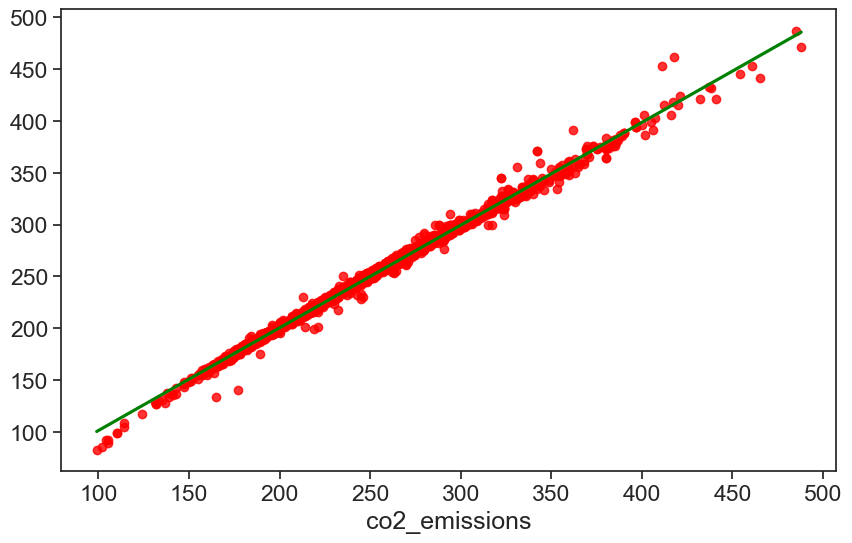

In [89]:
plt.figure(figsize=(10,6))
sns.regplot(data=final_data,x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.show()

# we are going to use linear regression model to our project deployment